<a href="https://colab.research.google.com/github/pentakll4002/supportVector/blob/main/Support_Vector_Regression_Implementation_Using_(GridSearchCV)%20(Editor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [166]:
## Dataset (Tips Dataset)
df = sns.load_dataset('tips')

In [167]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [169]:
df['sex'].value_counts()

,count
sex,
Male,157
Female,87


In [170]:
df['smoker'].value_counts()

,count
smoker,
No,151
Yes,93


In [171]:
df['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [172]:
df['time'].value_counts()

,count
time,
Dinner,176
Lunch,68


## Feature Encoding (Label Encoding And OneHotEncoding)

In [173]:
## Independent and Dependent Features
X = df.iloc[:, 1:]
y = df['total_bill']

In [174]:
X

,tip,sex,smoker,day,time,size
0,1.01,Female,No,Sun,Dinner,2
1,1.66,Male,No,Sun,Dinner,3
2,3.50,Male,No,Sun,Dinner,3
3,3.31,Male,No,Sun,Dinner,2
4,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,5.92,Male,No,Sat,Dinner,3
240,2.00,Female,Yes,Sat,Dinner,2
241,2.00,Male,Yes,Sat,Dinner,2
242,1.75,Male,No,Sat,Dinner,2


In [175]:
y

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [176]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [177]:
X_train.head()

,tip,sex,smoker,day,time,size
58,1.76,Male,Yes,Sat,Dinner,2
1,1.66,Male,No,Sun,Dinner,3
2,3.50,Male,No,Sun,Dinner,3
68,2.01,Male,No,Sat,Dinner,2
184,3.00,Male,Yes,Sun,Dinner,2


In [178]:
y_train

,total_bill
58,11.24
1,10.34
2,21.01
68,20.23
184,40.55
...,...
64,17.59
15,21.58
228,13.28
125,29.80


In [179]:
### Feature Encoding (Label Encoding and OneHot Encoding)
# Classification (2) => Label Encoding
# Classification (n) with n > 2 =>> OneHot Encoding

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

In [180]:
import warnings
warnings.filterwarnings('ignore')

le1.fit(pd.concat([X_train['sex'], X_test['sex']]))
le2.fit(pd.concat([X_train['smoker'], X_test['smoker']]))
le3.fit(pd.concat([X_train['time'], X_test['time']]))


X_train['sex'] = le1.fit_transform(X_train['sex'])
X_train['smoker'] = le2.fit_transform(X_train['smoker'])
X_train['time'] = le3.fit_transform(X_train['time'])

In [181]:
X_train.head()

,tip,sex,smoker,day,time,size
58,1.76,1,1,Sat,0,2
1,1.66,1,0,Sun,0,3
2,3.50,1,0,Sun,0,3
68,2.01,1,0,Sat,0,2
184,3.00,1,1,Sun,0,2


In [182]:
X_test['sex'] = le1.transform(X_test['sex'])
X_test['smoker'] = le2.transform(X_test['smoker'])
X_test['time'] = le3.transform(X_test['time'])

In [183]:
X_test.head()

,tip,sex,smoker,day,time,size
162,2.00,0,0,Sun,0,3
60,3.21,1,1,Sat,0,2
61,2.00,1,1,Sat,0,2
63,3.76,1,1,Sat,0,4
69,2.09,1,1,Sat,0,2


In [184]:
## OneHot Encoding -- Columns transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

### 3 is index to dataframe ('day')
ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first'), [3]),
                                     ], remainder='passthrough')

In [185]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [186]:
X_test

array([[0.  , 1.  , 0.  , 2.  , 0.  , 0.  , 0.  , 3.  ],
       [1.  , 0.  , 0.  , 3.21, 1.  , 1.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 2.  , 1.  , 1.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 3.76, 1.  , 1.  , 0.  , 4.  ],
       [1.  , 0.  , 0.  , 2.09, 1.  , 1.  , 0.  , 2.  ],
       [0.  , 0.  , 1.  , 5.  , 1.  , 1.  , 1.  , 2.  ],
       [0.  , 1.  , 0.  , 3.51, 1.  , 0.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 5.16, 1.  , 1.  , 0.  , 4.  ],
       [0.  , 1.  , 0.  , 5.  , 1.  , 0.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 3.6 , 1.  , 0.  , 0.  , 3.  ],
       [0.  , 1.  , 0.  , 5.65, 1.  , 1.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 2.5 , 0.  , 1.  , 0.  , 3.  ],
       [0.  , 0.  , 1.  , 1.44, 1.  , 0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  , 3.09, 0.  , 1.  , 0.  , 4.  ],
       [0.  , 1.  , 0.  , 2.  , 1.  , 0.  , 0.  , 4.  ],
       [0.  , 0.  , 1.  , 1.36, 0.  , 0.  , 1.  , 3.  ],
       [0.  , 0.  , 1.  , 2.  , 0.  , 0.  , 1.  , 2.  ],
       [0.  , 0.  , 1.  , 1.68,

In [187]:
## SVR -- Support Vector Regression
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [188]:
y_pred = svr.predict(X_test)

In [189]:
from sklearn.metrics import r2_score, mean_absolute_error

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.46028114561159283
4.1486423210190235


# Hyperparameters Turning for SVR by using GridSearchCV

In [190]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

In [191]:
grid = GridSearchCV(estimator=SVR(), param_grid=param_grid, refit=True, verbose=3, n_jobs=-1)

### Fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [192]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [193]:
grid.best_score_

0.491114987695256

In [194]:
grid_prediction = grid.predict(X_test)

In [195]:
from sklearn.metrics import r2_score, mean_absolute_error

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.46028114561159283
4.1486423210190235


In [197]:
grid.best_estimator_

SVR(C=100, gamma=0.001)

Shape of X_train: (183, 8)
Shape of transformed X_train: (183, 8)


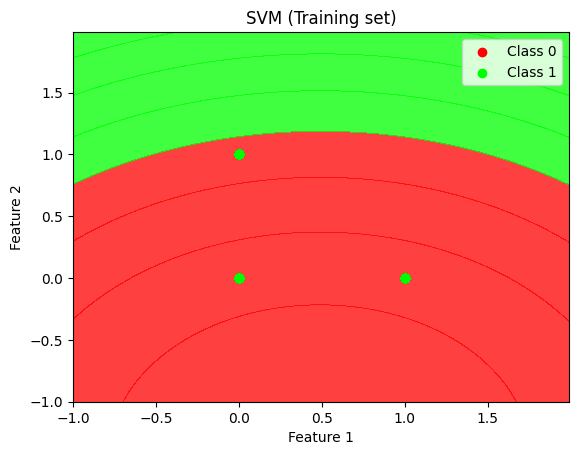

In [205]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Kiểm tra kích thước của X_train
print("Shape of X_train:", X_train.shape)

# Kiểm tra số lượng cột trong X_train
n_features = X_train.shape[1]

# ColumnTransformer chỉ định biến đổi cho tất cả các cột trong X_train
ct = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), list(range(n_features)))  # Áp dụng chuẩn hóa cho tất cả các cột
    ]
)

# Chuyển đổi X_train bằng ColumnTransformer
X_train_transformed = ct.fit_transform(X_train)
print("Shape of transformed X_train:", X_train_transformed.shape)

# Gán tập dữ liệu huấn luyện
X_set, y_set = X_train, y_train

# Tạo lưới điểm cho đường ranh giới quyết định
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Thêm các đặc trưng còn lại vào lưới điểm
grid_points = np.array([X1.ravel(), X2.ravel()]).T
placeholder = np.zeros((grid_points.shape[0], n_features))

# Chỉ lấy 2 đặc trưng đầu tiên từ X1 và X2
placeholder[:, :2] = grid_points
# Các đặc trưng còn lại sẽ được gán giá trị mặc định (ví dụ: 0)
placeholder[:, 2:] = 0

# Chuyển đổi các điểm lưới
transformed_grid_points = ct.transform(placeholder)

# Dự đoán trên các điểm lưới đã chuyển đổi
Z = grid.best_estimator_.predict(transformed_grid_points)  # Dự đoán từ mô hình SVR
Z = Z.reshape(X1.shape)

# Xác định bảng màu hợp lệ (sử dụng mã màu hợp lệ trong dạng tuple)
cmap = ListedColormap(['#FF0000', '#00FF00'])

# Vẽ đường ranh giới quyết định
plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Vẽ dữ liệu huấn luyện
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=cmap(i), label=f"Class {j}")

plt.title('SVM (Training set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Class 0', 'Class 1'])
plt.show()
